# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

- Calculate the PDF from a given dataset containing real-valued random variables
- Plot density functions and comment on the shape of the plot
- Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [12]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender']=='Male']
female_df =  data[data['Gender']=='Female']
data.head()
male_df
female_df
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
5005,Female,65.968019,156.802083
5006,Female,62.850379,114.969038
5007,Female,65.652156,165.083001
5008,Female,61.890234,111.676199
5009,Female,63.677868,104.151560


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

(array([  17.,   79.,  313.,  853., 1326., 1266.,  784.,  291.,   65.,
           6.]),
 array([54.26313333, 56.17577858, 58.08842383, 60.00106909, 61.91371434,
        63.8263596 , 65.73900485, 67.6516501 , 69.56429536, 71.47694061,
        73.38958587]),
 <a list of 10 Patch objects>)

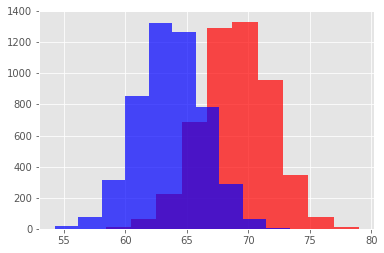

In [20]:
# Your code here
fig, ax = plt.subplots()

ax.hist(x=male_df['Height'],alpha=0.7,bins=10,color='red')
ax.hist(x=female_df['Height'],alpha = 0.7, bins=10,color='blue')

In [21]:
# Record your observations - are these inline with your personal observations?
#males are on average taller than females

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

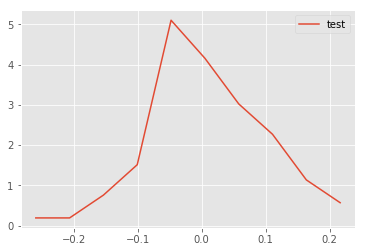

In [30]:
def density(x):
    n,bins = np.histogram(x,10,density=1)
    pdfx = np.zeros(n.shape)
    pdfy = np.zeros(n.shape)
    
    for k in range(n.size):
        pdfx[k]=0.5*(bins[k]+bins[k+1])
        pdfy[k]=n[k]
        
    return pdfx,pdfy
    
    
    
   


#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

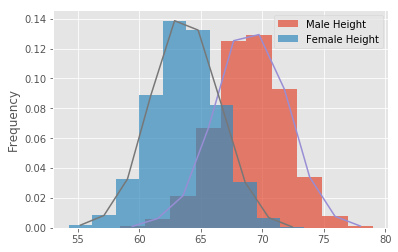

In [32]:
# You code here 
binsize=10
male_df.Height.plot.hist(bins=binsize,alpha=0.7,density=True,label='Male Height')
female_df.Height.plot.hist(bins=binsize,alpha=0.7,density=True,label='Female Height')
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.legend()

## Repeat the above exercise for male and female weights

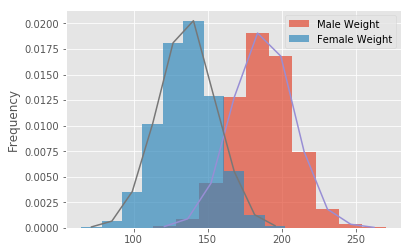

In [33]:
# Your code here 
binsize=10
male_df.Weight.plot.hist(bins=binsize,alpha=0.7,density=True,label='Male Weight')
female_df.Weight.plot.hist(bins=binsize,alpha=0.7,density=True,label='Female Weight')
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.legend()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


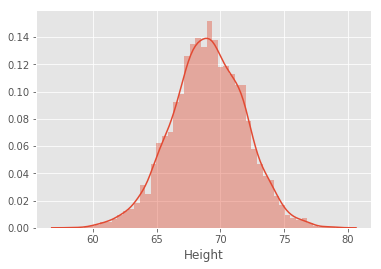

In [34]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(fem)

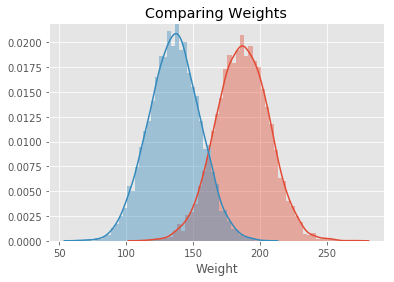

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.